In [1]:
!pip install pandas
!pip install pmdarima
!pip install neptune

In [2]:
!pip install matplotlib

In [3]:
!pip install yfinance

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2022-07-05  54.669998  55.840000  54.240002  55.810001  55.230537  1719900
2022-07-06  56.310001  57.410000  55.779999  57.130001  56.536831  1115200
2022-07-07  57.660000  59.799999  57.410000  59.470001  58.852535  2217200
2022-07-08  57.869999  59.840000  57.869999  59.759998  59.139519  1888500
2022-07-11  58.889999  59.450001  58.590000  59.299999  58.684296  2009000
...               ...        ...        ...        ...        ...      ...
2023-06-27  69.949997  69.949997  68.750000  68.849998  68.849998  1547500
2023-06-28  69.040001  69.239998  68.730003  68.940002  68.940002   887500
2023-06-29  68.949997  69.699997  68.860001  69.449997  69.449997  1549600
2023-06-30  69.699997  70.269997  69.589996  69.699997  69.699997  1840700
2023-07-03  70.550003  71.26999

<Axes: xlabel='Date'>

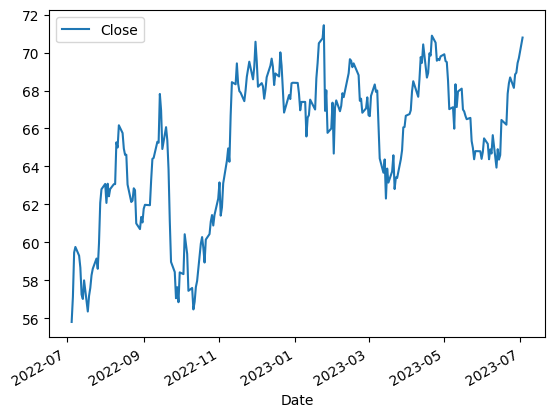

In [5]:
import yfinance as yf
hdfc_data = yf.download('HDB', start="2022-07-05", end="2023-07-5")
print(hdfc_data)
hdfc_data = hdfc_data[['Close']]

# nifty_data=nifty_data.fillna(nifty_data.interpolate())
hdfc_data.plot()

In [6]:
!pip install statsmodels

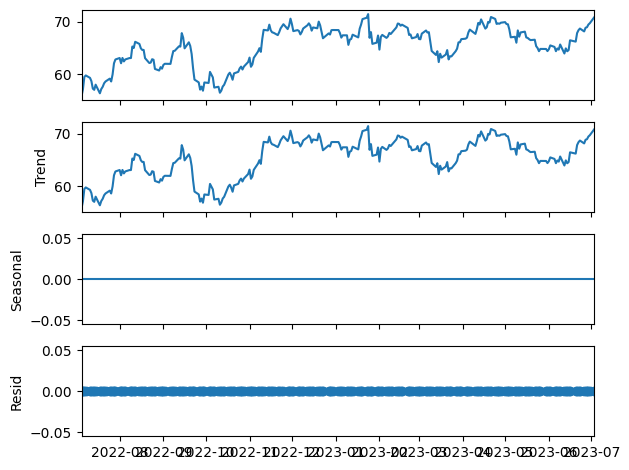

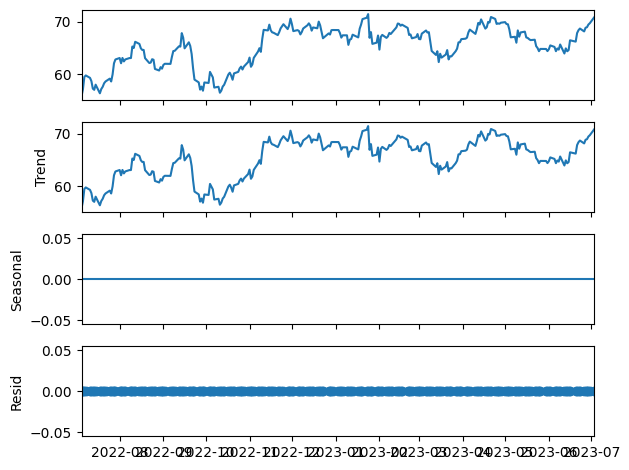

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose as sd
result = sd(x=hdfc_data,period=1)
result.plot()

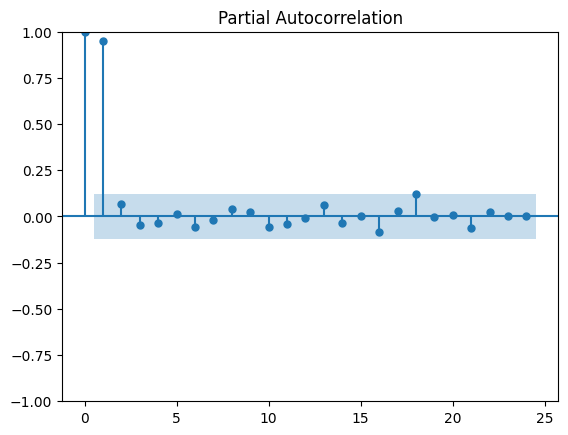

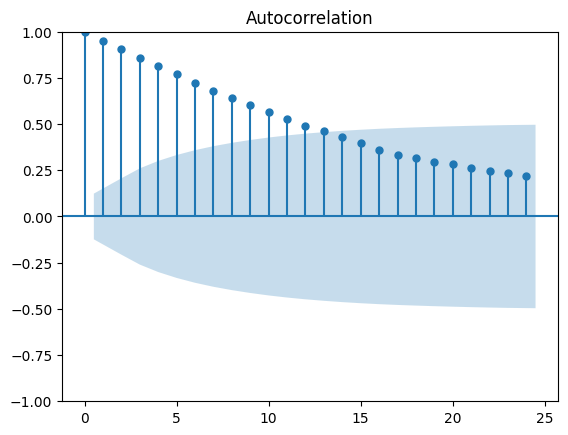

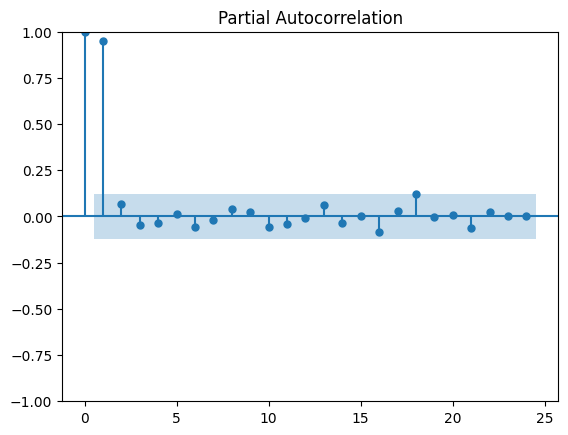

In [8]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(hdfc_data)
plot_pacf(hdfc_data)

In [9]:
from statsmodels.tsa.stattools import adfuller
adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(hdfc_data.Close.values)
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)

ADF test statistic: -2.254918562903894
ADF p-values: 0.18691989707984608
ADF number of lags used: 2
ADF number of observations: 248
ADF critical values: {'1%': -3.4569962781990573, '5%': -2.8732659015936024, '10%': -2.573018897632674}
ADF best information criterion: 668.6100412736603


<Axes: xlabel='Date'>

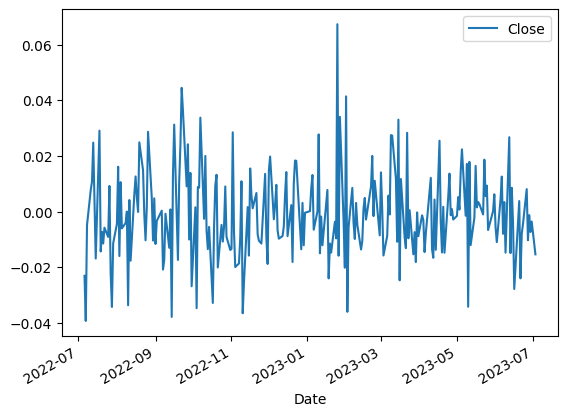

In [10]:
dif=(hdfc_data.shift()-hdfc_data)/hdfc_data
dif=dif.dropna()
dif.plot()

In [11]:
from statsmodels.tsa.stattools import adfuller
adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(dif.Close.values)
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)

ADF test statistic: -10.206994954010723
ADF p-values: 5.7694888077828446e-18
ADF number of lags used: 1
ADF number of observations: 248
ADF critical values: {'1%': -3.4569962781990573, '5%': -2.8732659015936024, '10%': -2.573018897632674}
ADF best information criterion: -1279.3742671146074


In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
from scipy import linalg
print(linalg.lapack.dgetrf([np.nan]))
print(linalg.lapack.dgetrf([np.inf]))

(array([nan]), array([0], dtype=int32), 0)
(array([inf]), array([0], dtype=int32), 0)


ARIMA Model applied here

In [14]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import TimeSeriesSplit as tss
from statsmodels.tsa.arima.model import ARIMA
y=hdfc_data.values
# train,test=tts(y,train_size=31,test_size=1)
p=0
d=0
q=0
e1=[]
for p in range (5):
     for d in range(5):
        for q in range(5):
            # model=ARIMA(train,order=(p,d,q)).fit()
            # pred=model.forecast(test.shape[0])
            # error=mse(test,pred)
            # e1.append(error)
            mses = []

            tscv = tss(n_splits=30,max_train_size = 3*31,test_size=1)
            for i, (train_index, test_index) in enumerate(tscv.split(y)):
        
                try:
                    train = y[train_index]
                    test = y[test_index]
            
                      # for each ts split do a model
                    model=ARIMA(train,order=(p,d,q)).fit()
                    pred=model.forecast(test.shape[0])
                    
                    ms = mse(test, pred)
                    mses.append(ms)
                except:
                    pass
            
                
            average_mse = np.mean(mses)
            e1.append(average_mse)
            
print(e1)                    

/opt/homebrew/Caskroom/miniforge/base/envs/workspace/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/homebrew/Caskroom/miniforge/base/envs/workspace/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/homebrew/Caskroom/miniforge/base/envs/workspace/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/homebrew/Caskroom/miniforge/base/envs/workspace/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

[4.877822129805393, 2.2309998902969803, 1.7355219598236145, 1.0961358106343022, 1.026958264173529, 0.6033087152221318, 0.5792939736320686, 0.5338409469119445, 0.5596699326057794, 0.6130748677622435, 1.4128139490218883, 0.6108100788272094, 0.5562830069635764, 0.5395278918905482, 0.564864088074392, 4.822643638235456, 1.4325736464874024, 0.5838948693681736, 0.5476676563949661, 0.5315363344610247, 17.43231346590206, 4.843138755466116, 1.4857065942449297, 0.6788949716835359, 0.5788774463266598, 0.6484810996464848, 0.6178245991503741, 0.5837972014431337, 0.6020506623929259, 0.6359231335196699, 0.5705968753426585, 0.5631054370902412, 0.5425799642644699, 0.5320671325735913, 0.5923255806913463, 0.6903064363643703, 0.5369962166635787, 0.5512176242764781, 0.5486663128047539, 0.53017064152194, 1.6789878237558435, 0.6961628288902819, 0.5386592598156297, 0.5255139989541279, 0.5433246736822298, 5.01378888477011, 1.7085285916365291, 0.7625947187174007, 0.5707318797526109, 0.6752085102416339, 0.6078776

/opt/homebrew/Caskroom/miniforge/base/envs/workspace/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/Caskroom/miniforge/base/envs/workspace/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/homebrew/Caskroom/miniforge/base/envs/workspace/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


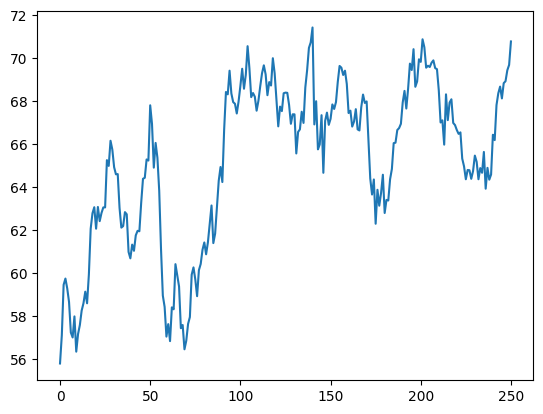

In [15]:
plt.plot(y)

In [16]:
min1=e1[0]
j=0
i=0
k=0
l=len(e1)

for i in e1:
    if(i<min1):
        min1=i
min2=e1[0]
for j in e1:
    if(j==min1):
        pass
    elif(j<min2):
        min2=j

a=0
for k in range(l):
    if(e1[k]==min1):
        a=k
print(min1)
print(min2)
p=a//25
d=(a%25)//5
q=(a%25)%5
print(p,d,q)

0.4936808172257229
0.5255139989541279
3 0 1


In [16]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(y, train_size=200)
mod=ARIMA(y,order=(2,2,4)).fit()
pred=mod.forecast(test.shape[0])
plt.plot(y[:200])
plt.plot(y[200:], pred)
plt.plot(train)

NameError: name 'y' is not defined

XGBoost Model apllied

In [18]:
!pip install xgboost

In [19]:
y=dif.Close.values
x_data = []
y_data = []
for i in range(len(y) - 31):
    x_data.append(y[i:i+30])
    y_data.append(y[i+30])

x_windows = np.vstack(x_data)
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as mse
parameters={'max_depth':list(range(2,20,4)),'gamma': list(range(0, 10, 2)),'min_child_weight' : list(range(0, 10, 2)),'eta': [0.01,0.05, 0.1, 0.15,0.2,0.3,0.5]}
param_list = [(x, y, z, a) for x in parameters['max_depth'] for y in parameters['gamma'] for z in parameters['min_child_weight'] for a in parameters['eta']]
e1=[]
for params in param_list:
    mses = []
    my_kfold = KFold(n_splits=10, shuffle=True, random_state=0)
    for train_index,test_index in my_kfold.split(x_windows):
        x_train, x_test = x_windows[train_index], x_windows[test_index]
        y_train, y_test = np.array(y_data)[train_index], np.array(y_data)[test_index]
        xgb_model = xgb.XGBRegressor(max_depth=params[0],gamma=params[1], min_child_weight=params[2], eta=params[3])
        xgb_model.fit(x_train, y_train)
        preds = xgb_model.predict(x_test)

        mses.append(mse(y_test, preds))
    average_mse = np.mean(mses)
    e1.append(average_mse)
print(e1)
    

[0.03410849485011957, 0.00026999160133384873, 0.00027936667526648126, 0.0002858414032788508, 0.0003007794185549592, 0.0003107406951951677, 0.0003396543537716673, 0.03410849485011957, 0.0002700309051752168, 0.000269362547284363, 0.0002927641657710027, 0.000303014038029003, 0.0003229302202265289, 0.0003852244675236256, 0.03410849485011957, 0.0002738021970655333, 0.0002816223470981632, 0.00029738601231340324, 0.00030995164003727946, 0.0003342220214949766, 0.00035430313488792064, 0.03410849485011957, 0.0002706114566223701, 0.0002819366456828555, 0.00030869368112587615, 0.0003183975486996245, 0.00033241499248793283, 0.00036781552009303793, 0.03410849485011957, 0.0002703468268137536, 0.0002901177723102472, 0.0003228406234333924, 0.00033512805060077424, 0.0003537931018146383, 0.0003782138620102734, 0.03410849485011957, 0.0002556845747836856, 0.00024649219257089403, 0.0002464922541173791, 0.00024649225509462615, 0.0002464922551760117, 0.0002464922551293721, 0.03410849485011957, 0.0002556845747

In [21]:
min1=e1[0]
j=0
i=0
k=0
l=len(e1)

for i in e1:
    if(i<min1):
        min1=i
min2=e1[0]
for j in e1:
    if(j==min1):
        pass
    elif(j<min2):
        min2=j

a=0
for k in range(l):
    if(e1[k]==min1):
        a=k
print(a)
print(min1)
print(min2)

870
0.00024649219257089403
0.0002464922541173791


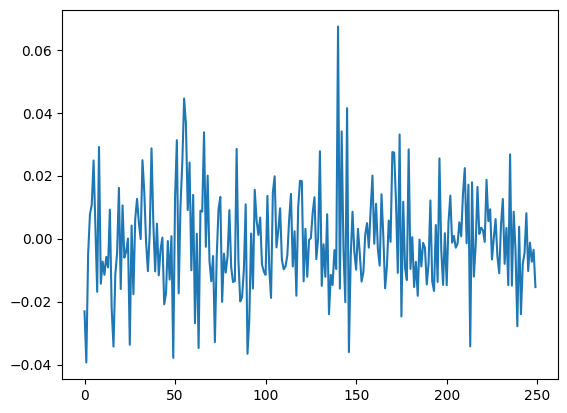

In [23]:
plt.plot(y)

In [24]:
!pip install tensorflow

In [25]:
import tensorflow as tf
x_data = []
y_data = []
for i in range(len(y) - 3*31):
    x_data.append(y[i:i+3*31])
    y_data.append(y[i+3*31])
x_windows = np.vstack(x_data)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_windows, np.array(y_data), test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val  = train_test_split(x_train, y_train, test_size=0.25, random_state=1)


last_mse=[]
archi_list = [
              [tf.keras.layers.LSTM(32, return_sequences=True,  input_shape=(3*31,1)),tf.keras.layers.LSTM(32, return_sequences=True),tf.keras.layers.Dense(units=1)],
              [tf.keras.layers.LSTM(64, return_sequences=True,  input_shape=(3*31,1)),tf.keras.layers.LSTM(64, return_sequences=True),tf.keras.layers.Dense(units=1)],
              [tf.keras.layers.LSTM(128, return_sequences=True,  input_shape=(3*31,1)),tf.keras.layers.LSTM(128, return_sequences=True),tf.keras.layers.Dense(units=1)],
              [tf.keras.layers.LSTM(32, return_sequences=True,  input_shape=(3*31,1)),tf.keras.layers.LSTM(32, return_sequences=True),tf.keras.layers.LSTM(32, return_sequences=True),tf.keras.layers.Dense(units=1)],
              [tf.keras.layers.LSTM(64, return_sequences=True,  input_shape=(3*31,1)),tf.keras.layers.LSTM(64, return_sequences=True),tf.keras.layers.LSTM(64, return_sequences=True),tf.keras.layers.Dense(units=1)],

]
for archi in archi_list:
    lstm_model = tf.keras.models.Sequential(archi)
    lstm_model.compile(loss=tf.losses.MeanSquaredError(),optimizer=tf.optimizers.Adam(),metrics=[tf.metrics.MeanSquaredError()])
    history = lstm_model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))
    mses=history.history['val_mean_squared_error'][-1]
    last_mse.append(mses)

print(last_mse)




Epoch 1/10
3/3 [==============================] - 1s 131ms/step - loss: 2.6558e-04 - mean_squared_error: 2.6558e-04 - val_loss: 2.5466e-04 - val_mean_squared_error: 2.5466e-04
Epoch 2/10
3/3 [==============================] - 0s 23ms/step - loss: 2.6221e-04 - mean_squared_error: 2.6221e-04 - val_loss: 2.8634e-04 - val_mean_squared_error: 2.8634e-04
Epoch 3/10
3/3 [==============================] - 0s 23ms/step - loss: 2.2581e-04 - mean_squared_error: 2.2581e-04 - val_loss: 1.9342e-04 - val_mean_squared_error: 1.9342e-04
Epoch 4/10
3/3 [==============================] - 0s 23ms/step - loss: 2.4354e-04 - mean_squared_error: 2.4354e-04 - val_loss: 1.9253e-04 - val_mean_squared_error: 1.9253e-04
Epoch 5/10
3/3 [==============================] - 0s 22ms/step - loss: 2.3309e-04 - mean_squared_error: 2.3309e-04 - val_loss: 2.2374e-04 - val_mean_squared_error: 2.2374e-04
Epoch 6/10
3/3 [==============================] - 0s 22ms/step - loss: 2.2527e-04 - mean_squared_error: 2.2527e-04 - val_los

Epoch 1/10
3/3 [==============================] - 1s 144ms/step - loss: 3.0615e-04 - mean_squared_error: 3.0615e-04 - val_loss: 3.1274e-04 - val_mean_squared_error: 3.1274e-04
Epoch 2/10
3/3 [==============================] - 0s 40ms/step - loss: 2.8596e-04 - mean_squared_error: 2.8596e-04 - val_loss: 2.8520e-04 - val_mean_squared_error: 2.8520e-04
Epoch 3/10
3/3 [==============================] - 0s 38ms/step - loss: 2.2874e-04 - mean_squared_error: 2.2874e-04 - val_loss: 1.9299e-04 - val_mean_squared_error: 1.9299e-04
Epoch 4/10
3/3 [==============================] - 0s 40ms/step - loss: 2.5051e-04 - mean_squared_error: 2.5051e-04 - val_loss: 1.9325e-04 - val_mean_squared_error: 1.9325e-04
Epoch 5/10
3/3 [==============================] - 0s 39ms/step - loss: 2.2401e-04 - mean_squared_error: 2.2401e-04 - val_loss: 2.3470e-04 - val_mean_squared_error: 2.3470e-04
Epoch 6/10
3/3 [==============================] - 0s 39ms/step - loss: 2.3483e-04 - mean_squared_error: 2.3483e-04 - val_los

Epoch 1/10
3/3 [==============================] - 1s 189ms/step - loss: 3.7445e-04 - mean_squared_error: 3.7445e-04 - val_loss: 1.9483e-04 - val_mean_squared_error: 1.9483e-04
Epoch 2/10
3/3 [==============================] - 0s 90ms/step - loss: 2.9564e-04 - mean_squared_error: 2.9564e-04 - val_loss: 1.9346e-04 - val_mean_squared_error: 1.9346e-04
Epoch 3/10
3/3 [==============================] - 0s 87ms/step - loss: 2.3547e-04 - mean_squared_error: 2.3547e-04 - val_loss: 3.4389e-04 - val_mean_squared_error: 3.4389e-04
Epoch 4/10
3/3 [==============================] - 0s 91ms/step - loss: 2.5384e-04 - mean_squared_error: 2.5384e-04 - val_loss: 2.1175e-04 - val_mean_squared_error: 2.1175e-04
Epoch 5/10
3/3 [==============================] - 0s 88ms/step - loss: 2.2608e-04 - mean_squared_error: 2.2608e-04 - val_loss: 1.9342e-04 - val_mean_squared_error: 1.9342e-04
Epoch 6/10
3/3 [==============================] - 0s 90ms/step - loss: 2.4706e-04 - mean_squared_error: 2.4706e-04 - val_los

Epoch 1/10
3/3 [==============================] - 2s 251ms/step - loss: 3.1729e-04 - mean_squared_error: 3.1729e-04 - val_loss: 3.5354e-04 - val_mean_squared_error: 3.5354e-04
Epoch 2/10
3/3 [==============================] - 0s 32ms/step - loss: 3.3704e-04 - mean_squared_error: 3.3704e-04 - val_loss: 3.0109e-04 - val_mean_squared_error: 3.0109e-04
Epoch 3/10
3/3 [==============================] - 0s 32ms/step - loss: 2.3490e-04 - mean_squared_error: 2.3490e-04 - val_loss: 1.9590e-04 - val_mean_squared_error: 1.9590e-04
Epoch 4/10
3/3 [==============================] - 0s 31ms/step - loss: 2.6068e-04 - mean_squared_error: 2.6068e-04 - val_loss: 1.9282e-04 - val_mean_squared_error: 1.9282e-04
Epoch 5/10
3/3 [==============================] - 0s 31ms/step - loss: 2.3380e-04 - mean_squared_error: 2.3380e-04 - val_loss: 2.3986e-04 - val_mean_squared_error: 2.3986e-04
Epoch 6/10
3/3 [==============================] - 0s 31ms/step - loss: 2.3103e-04 - mean_squared_error: 2.3103e-04 - val_los

Epoch 1/10
3/3 [==============================] - 2s 198ms/step - loss: 3.3287e-04 - mean_squared_error: 3.3287e-04 - val_loss: 3.7826e-04 - val_mean_squared_error: 3.7826e-04
Epoch 2/10
3/3 [==============================] - 0s 55ms/step - loss: 3.4037e-04 - mean_squared_error: 3.4037e-04 - val_loss: 3.2434e-04 - val_mean_squared_error: 3.2434e-04
Epoch 3/10
3/3 [==============================] - 0s 54ms/step - loss: 2.4841e-04 - mean_squared_error: 2.4841e-04 - val_loss: 1.9641e-04 - val_mean_squared_error: 1.9641e-04
Epoch 4/10
3/3 [==============================] - 0s 55ms/step - loss: 2.5658e-04 - mean_squared_error: 2.5658e-04 - val_loss: 1.9366e-04 - val_mean_squared_error: 1.9366e-04
Epoch 5/10
3/3 [==============================] - 0s 54ms/step - loss: 2.2699e-04 - mean_squared_error: 2.2699e-04 - val_loss: 2.2495e-04 - val_mean_squared_error: 2.2495e-04
Epoch 6/10
3/3 [==============================] - 0s 54ms/step - loss: 2.2528e-04 - mean_squared_error: 2.2528e-04 - val_los

In [26]:
min1=last_mse[0]
j=0
i=0
k=0
l=len(last_mse)

for i in last_mse:
    if(i<min1):
        min1=i
min2=last_mse[0]
for j in last_mse:
    if(j==min1):
        pass
    elif(j<min2):
        min2=j

a=0
for k in range(l):
    if(last_mse[k]==min1):
        a=k
print(a)
print(min1)
print(min2)

2
0.00019448807870503515
0.00021405814914032817


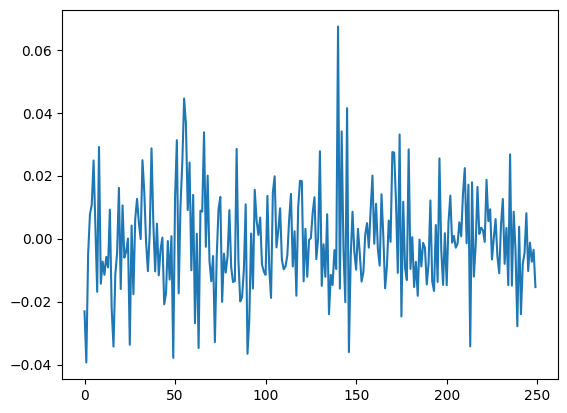

In [27]:
plt.plot(y)
